<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h2>Assignment 1</h2>

<b>Due on: February 6th, 2024  23:59 ADT</b><p>Or by February 14th, 2024  23:59 ADT with a 10% penalty</p>
</center>

### Remember, this assignment is optional!

[Assignment Submission Instructions](https://docs.google.com/document/d/1iHzvkaZzNyZJ54Qw4eXJYOC2vzQUPliMyEBbZVRiS4Q/edit?usp=sharing)


In this assignment you will explore regression and gradient descent, two of the most fundamental building blocks in machine learning and data science. You will also continue exploring creating synthetic data sets (as you already did for A0), one of the most valuable skills in machine learning: creating your own synthetic data set is the best ML debugging tool I know of!

The first step will be to create your dataset (Question 1). Then you will build a regression solver (Question 2). And finally, you will improve your model to make it more powerful (Question 3). For top marks you will also add a regularization term, so that your powerful model isn’t *too* powerful :)


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

## **1. Data Generation** ( pts)

You will create a set of functions that generate data which can be used to train a regression model. The regression will ultimately take one input, $x$, and produce one (target) output, $t$. However, your data generation function will also take some parameters, as described next…

### a) Linear Data
First, write a function `generate_line(n=100, xmin=0, xmax=10, c0=0, c1=0)`
that randomly chooses $n$ input points in the interval $[x_{min}, x_{max}]$. For each $x$ in this list it computes a target $t = c_0 + c_1 x$. It returns a list (or `numpy.ndarray`) $[[x_0, t_0], [x_1,t_1], \dots, [x_n,t_n]]$. For example:
```python
data = generate_line(3, 0, 5, 1, 2)
data
>    [[2.39126432027044, 5.78252864054088],
      [3.750966822926141, 8.501933645852283],
      [1.9454086762362344, 4.890817352472469]]
```

[[6.33928359 6.33928359]
 [7.00496398 7.00496398]
 [7.86983674 7.86983674]
 [8.44903461 8.44903461]
 [9.79473391 9.79473391]
 [6.99851997 6.99851997]
 [6.7021345  6.7021345 ]
 [2.8976917  2.8976917 ]
 [1.96201246 1.96201246]
 [0.84756231 0.84756231]
 [3.22808645 3.22808645]
 [6.34731106 6.34731106]
 [1.61978679 1.61978679]
 [6.41477452 6.41477452]
 [3.131058   3.131058  ]
 [4.72728001 4.72728001]
 [5.2188611  5.2188611 ]
 [3.73612743 3.73612743]
 [4.55473073 4.55473073]
 [2.8788222  2.8788222 ]
 [0.96025869 0.96025869]
 [7.13737129 7.13737129]
 [4.72263552 4.72263552]
 [8.17799612 8.17799612]
 [7.4506977  7.4506977 ]
 [3.43688268 3.43688268]
 [0.50918496 0.50918496]
 [8.77596974 8.77596974]
 [0.39023831 0.39023831]
 [2.89409773 2.89409773]
 [5.25362299 5.25362299]
 [5.91619905 5.91619905]
 [5.22249405 5.22249405]
 [1.99073068 1.99073068]
 [7.27494722 7.27494722]
 [6.56046451 6.56046451]
 [9.45855879 9.45855879]
 [5.7211445  5.7211445 ]
 [9.14613501 9.14613501]
 [1.88855519 1.88855519]


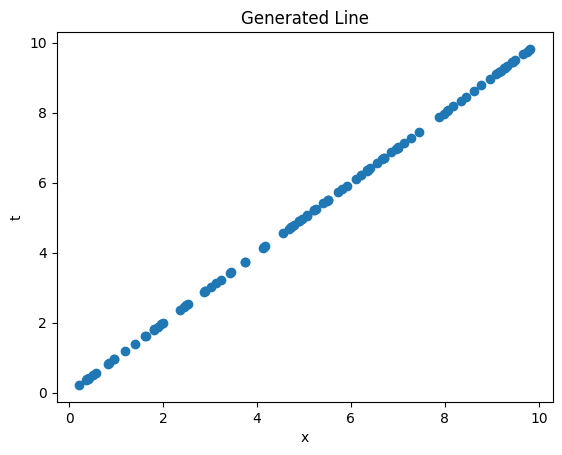

In [ ]:
def generate_line(n=100, xmin=0, xmax=10, c0=0, c1=0):
    # your code here
    x_values = np.random.uniform(xmin, xmax, n)
    t_values = c0 + c1 * x_values
    data = np.column_stack((x_values, t_values))
    return data

# your plotting code here

data = generate_line(100, 0, 10, 0, 1)
print(data)

plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('x')
plt.ylabel('t')
plt.title('Generated Line')
plt.show()

### b) Polynomial Data
Now modify the above function, to create a new function:

 `generate_poly(n=100, xmin=0, xmax=10, coeffs=[1, 2])`

This is the same as `generate_line`, except that instead of two parameters $c_0$ ane $c_1$, you can provide as an argument a vector $[c_0, c_1, \dots, c_D]$ of arbitrary length $D+1$, where the $c_i$'s  represent the coefficients of a polynomial.

 So for example, if you write:
 `generate_poly(coeffs=[1, 5, 2, -4])`
then this would generate points along the polynomial $t = 1 + 5x + 2x^2 - 4 x^3$.

That is, $\text{coeffs}=[c_0, c_1, \dots, c_D]$ will make your function generate data from the polynomial $t = c_0 + c_1 x + c_2 x^2 + … + c_D x^D$. This function should also return a list (or `numpy.ndarray`) $[[x_0, t_0], [x_1,t_1], \dots, [x_n,t_n]]$.

[[-3.17602448e+00 -6.90280862e+01]
 [ 1.82265965e+00  2.99756411e+00]
 [-3.48906902e+00 -8.77607850e+01]
 [-3.04538890e+00 -6.20592364e+01]
 [-1.76863552e+00 -1.63886554e+01]
 [ 6.85558161e-01  1.25611910e+00]
 [-5.73546089e-01 -9.18545577e-01]
 [-1.63885813e-02  9.74740162e-01]
 [ 1.98886003e+00  3.92820894e+00]
 [ 7.87778973e-01  1.24129450e+00]
 [-2.43941559e+00 -3.56814299e+01]
 [-1.68102876e+00 -1.45241224e+01]
 [-9.64139756e-01 -3.89041209e+00]
 [ 7.72545280e-01  1.24309648e+00]
 [ 1.93658526e+00  3.60759256e+00]
 [-1.84169674e+00 -1.80506041e+01]
 [-3.14371619e-01  2.42532290e-01]
 [ 1.04724495e+00  1.26473316e+00]
 [ 7.80453803e-01  1.24213631e+00]
 [-2.51960500e+00 -3.86447859e+01]
 [-3.37226418e+00 -8.04262446e+01]
 [-1.12230155e-01  7.98398739e-01]
 [ 2.19068727e+00  5.42994259e+00]
 [-7.86815945e-01 -2.33679911e+00]
 [-1.51308519e+00 -1.13233170e+01]
 [-3.23892123e-01  2.09423721e-01]
 [-1.68740986e+00 -1.46553072e+01]
 [-1.60708569e+00 -1.30557640e+01]
 [ 7.80489748e-01  1

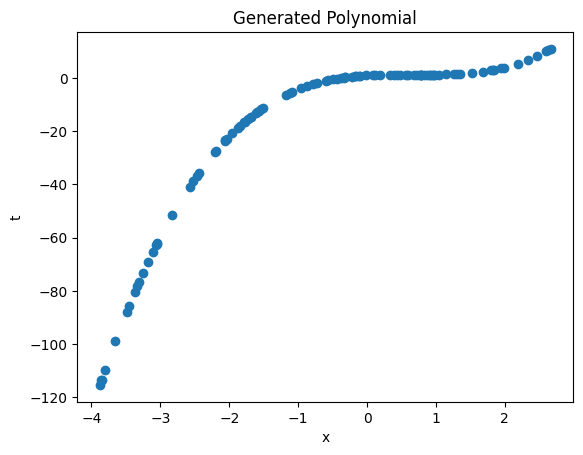

In [ ]:
# try these values for your polynomial!
num_pts = 100
x_min, x_max = (-4, 3)
coefficients = [5/4, -5/2, 3/2, 1]

def generate_poly(n=100, xmin=0, xmax=10, coeffs=[1, 2]):
    # your code here
    x_values = np.random.uniform(xmin, xmax, n)
    t_values = np.polyval(coeffs, x_values)
    data = np.column_stack((x_values, t_values))
    return data

# your plotting code here

data_poly = generate_poly(num_pts, x_min, x_max, coefficients)
print(data_poly)

plt.scatter(data_poly[:, 0], data_poly[:, 1])
plt.xlabel('x')
plt.ylabel('t')
plt.title('Generated Polynomial')
plt.show()


### c) Noisy Polynomial Data.
Finally, rewrite your `generate_poly()` function to use the function `noise(mean, standard_deviation)` below to add random gaussian noise to every generated data point, so that the targets $t$ are
$t = \Sigma_i (c_i x^i) + \text{noise}(\theta, \sigma)$.

[[-3.96593400e-01  6.59017747e-01]
 [-7.19504059e-01 -1.49916534e+00]
 [-2.59374070e+00 -4.07093270e+01]
 [ 7.71853478e-01  2.70492292e+00]
 [-2.02329818e+00 -2.17828198e+01]
 [-1.26879997e+00 -7.03067575e+00]
 [ 2.03034217e-01  1.96698454e+00]
 [-9.30846760e-01 -2.98189776e+00]
 [-1.95876333e-01  3.39552843e-01]
 [ 1.48824559e+00  2.74688930e+00]
 [-1.14942389e+00 -5.77198819e+00]
 [-2.76729428e+00 -4.87814155e+01]
 [-2.64233126e-02  9.38565056e-01]
 [-1.42463079e+00 -9.22775546e+00]
 [-1.53112670e+00 -1.14149842e+01]
 [ 1.58768265e+00  2.48450150e+00]
 [-2.64615823e+00 -4.31690970e+01]
 [-1.62267330e+00 -1.37792264e+01]
 [ 5.21643084e-01  1.61154784e+00]
 [-2.84467176e+00 -5.15451854e+01]
 [ 7.87895602e-01  9.31148063e-01]
 [-4.11834015e-01  5.46450424e-01]
 [-1.64169363e+00 -1.25485575e+01]
 [ 9.64787706e-01  1.34298618e+00]
 [ 2.98032629e+00  1.59982107e+01]
 [ 7.32326619e-02  1.22595106e+00]
 [-3.07402772e+00 -6.31640179e+01]
 [ 7.37694637e-01  8.70350264e-01]
 [ 1.46313662e+00  2

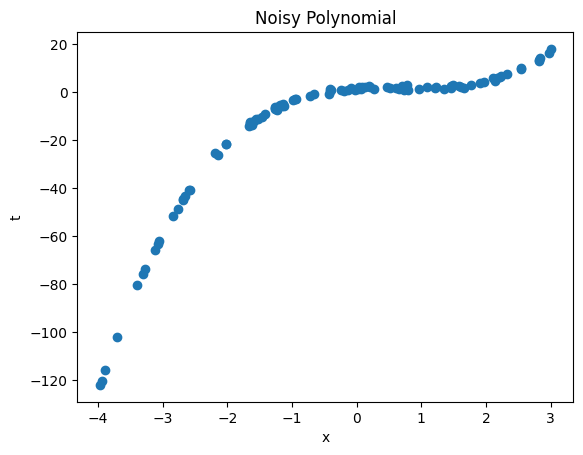

In [ ]:
def noise(mean, standard_deviation):
    return random.gauss(mean, standard_deviation)

def generate_poly_noisy(n=100, xmin=0, xmax=10, coeffs=[1], theta=0.5, sigma=0.5):
    # your code here

    x_values = np.random.uniform(xmin, xmax, n)
    # add random gaussian noise to every generated data point
    t_values = np.polyval(coeffs, x_values) + np.vectorize(lambda _: noise(theta, sigma))(x_values)
    data = np.column_stack((x_values, t_values))
    return data

# plot your noisy polynomial data here

data_poly_noisy = generate_poly_noisy(num_pts, x_min, x_max, coefficients, 0.5, 0.5)
# data_poly_noisy = generate_poly_noisy(100, 0, 10, [1], 0.5, 0.5)
print(data_poly_noisy)

plt.scatter(data_poly_noisy[:, 0], data_poly_noisy[:, 1])
plt.xlabel('x')
plt.ylabel('t')
plt.title('Noisy Polynomial')
plt.show()

## **2. Gradient Descent** (12 pts)
In this question we will learn first hand how gradient descent works, in the context of a synthetic dataset and a simple model:

You will write functions that implement gradient descent to fit a linear regression model to data. To test your model and your optimizer, you will use data generated by your function from Question 1.

Note that to keep the assignment short, you are not required to use a validation or test set. Normally this would be an essential part of the process. However, this exercise focuses on the inner workings of gradient descent applied to the quadratic cost function as (was / will be) learned in class.

Your model will have the form

$y = w_0 + w_1 x$,

where $w_0$ and $w_1$ are the parameters of your model, $x$ is the input, and $y$ is your model's prediction.


> Note: It's important that the
code you write is well documented and that no other external package is used (pandas, numpy
are ok).

### a) Linear Regression

Given the values of $x$, we want to fit a linear regression model to predict the $y$ values. We will implement a vectorized version of the gradient descent algorithm. Input ($\mathbf{X}$) and target ($t$) are provided as arguments. $\mathbf{X}$ is modified ($\mathbf{X}_b$) to account for the bias. The coefficients ($\theta$) have been initialized for you. Use Mean Squared Error as the loss function. The shape of the variables $\mathbf{X}$, $t$, and **b** have been given, use this as a guide to output the appropriate shape.

Fill in the gradient descent iteration loop and return the updated `cost_list` and parameters. Please be sure your code is well commented!

> Hint: Some tips for choosing values for the learning rate `lr` and the number of steps to run for `iterations`: this depends greatly on the complexity of your dataset and the sophistication of your model. In this instance the learning rate is can be small, on the order of ~0.001. As for the number of iterations, try running the algorithm for 1000 steps. If it seems the model has stopped learning after fewer, say, 500, reduce the number of iterations and run it again!

In [ ]:
def LR(X, t, lr, iterations):
    # Adding 1 column in X for bias
    b = np.ones((len(X), 1))             # shape : (N, 1)
    X_b = np.append(X, b, axis=1)        # shape : (N, features + 1)  X
    theta = np.zeros((X_b.shape[1], 1))  # shape : (features + 1, 1)  w
    t = t.reshape(-1, 1)                 # shape : (N, 1)
    cost_list = []

    for _ in range(iterations):
        # your code here，，，，

        # Compute predictions (y) using the current theta, y = Xw
        y = np.dot(X_b, theta)  # shape: (N, 1)

        # Compute the loss function
        error = y - t  # shape: (N, 1)

        # Compute the gradient, using chain rule
        gradient = 2 * np.dot(X_b.T, error) / len(X)  # shape: (features + 1, 1)

        # Update the parameters using the gradient and learning rate
        theta = theta - lr * gradient  # shape: (features + 1, 1)

        # Compute the mean squared error and append to the cost_list
        cost = np.mean((error)**2)
        cost_list.append(cost)

    return cost_list, y, theta

We've included a function below to help you visualize your model's predictions. Pass in your dataset with input $\mathbf{X}$ and target $t$, and your model's predictions $y$ and cost list `cost_list` as returned from `LR()` to see them graphed.

In [ ]:
def graph_lr(X, t, y, cost_list):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.title('Model Predictions vs Actual Targets')
    plt.scatter(X, t, c='g', s=10, label="targets")
    plt.scatter(X, y, c='b', s=10, label="predictions")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title('Model Cost')
    #plt.plot(range(iter), cost_list, c='b')
    plt.plot(range(len(cost_list)), cost_list, c='b')
    plt.show()

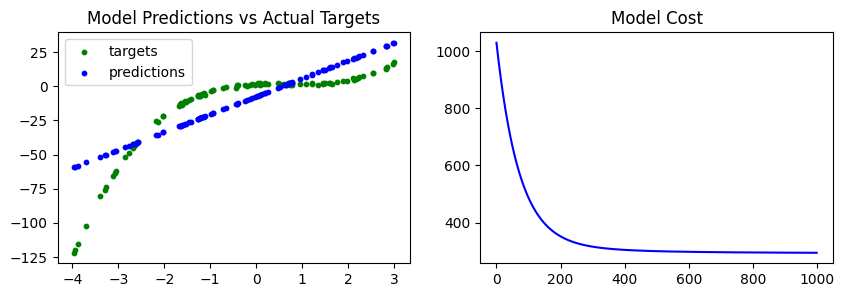

In [ ]:
# plot how loss changes with iterations here

# Extract X and t from the generated Noisy Polynomial Data
X = data_poly_noisy[:, 0].reshape(-1, 1)  # Reshape X to have the correct shape (N, features)
t = data_poly_noisy[:, 1].reshape(-1, 1)  # Reshape t to have the correct shape (N,)

# Set the learning rate and number of iterations
lr = 0.001
iter = 1000

# Run linear regression
cost_list, y, theta = LR(X, t, lr, iter)

# Visualize the model's predictions and cost
graph_lr(X, t, y, cost_list)

### b) Closed Form Solution
Compare this model with a solution computed in closed form. Input ($\mathbf{X}$) and target ($t$) are provided as arguments. $\mathbf{X}$ is modified ($\mathbf{X}_b$) to account for the bias. The function should return the optimum parameter $\theta$.


In [ ]:
from numpy.linalg import inv

def linear_direct(X, t):
  theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, t))

  return theta

In [ ]:
# Parameters found by direct method (closed form)
linear_direct(X, t).astype(int)

array([[11]])

In [ ]:
# Parameters found by gradient descent
theta.astype(int)

array([[10],
       [-6]])

### c) Discussion

Discuss how the choice of learning rate and number of iterations in part a) affects the fitting of the model.

small learning rate:\
slow convergence, need more time.\
large learning rate:\
it is easy overshoot the minimum and induce "oscillation" around the minimum.\
small iterations:\
induce model underfit because converge step is insufficient.
\
many iterations:\
induce model overfit because many noise would be captured.


### d) Stochastic Gradient Descent

Write a version of gradient descent that does stochastic gradient descent with mini-batches as described in class. The function will take the same parameters as before, but also an additional parameter `m` that specifies the mini-batch size.

Provide error plots and experiment with different values of mini-batch size `m` and step-size (learning rate `lr`). Show how you can call it so that it works reasonably well, and discuss your observations briefly. Are you able to call it in a way so that it does not work?

In [ ]:
def stochastic_gradient_descent(X, t, lr, iterations, m):
    b = np.ones((len(X), 1))             # shape : (N, 1)
    X_b = np.append(X, b, axis=1)        # shape : (N, features + 1)
    t = t.reshape(-1, 1)                 # shape : (N, 1)
    theta = np.zeros((X_b.shape[1], 1))  # shape : (features + 1 ,1)
    cost_list = []

    for _ in range(iterations):
    # your code here

        # Shuffle the data to create mini-batches
        indices = np.random.permutation(len(X))
        X_shuffled = X_b[indices]
        t_shuffled = t[indices]

        # Mini-batch gradient descent
        for i in range(0, len(X), m):

            end_index = min(i + m, len(X))  # Ensure not to go beyond the end of the dataset
            X_mini_batch = X_shuffled[i:end_index]
            t_mini_batch = t_shuffled[i:end_index]

            # Compute predictions (y) using the current theta
            y_mini_batch = np.dot(X_mini_batch, theta)

            # Compute the loss function
            error_mini_batch = y_mini_batch - t_mini_batch

            # Compute the gradient, using the chain rule
            gradient_mini_batch = 2 * np.dot(X_mini_batch.T, error_mini_batch) / min (m, len(X) - m)

            # Update the parameters using the gradient and learning rate
            theta = theta - lr * gradient_mini_batch

            # Compute the mean squared error and append to the cost_list
            cost_mini_batch = np.mean((error_mini_batch)**2)
            cost_list.append(cost_mini_batch)

    return cost_list, theta


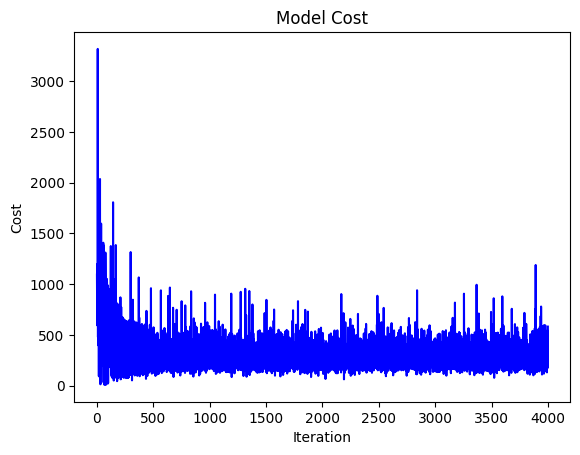

In [ ]:
# your error plot code here

def plot_error(cost_list, title="Model Cost"):
    plt.plot(cost_list, c='b')
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()

lr = 0.001
iterations = 1000
mini_batch_size = 32

# Run stochastic gradient descent with mini-batches
cost_list, theta = stochastic_gradient_descent(X, t, lr, iterations, mini_batch_size)

# Visualize the model's cost over iterations
plot_error(cost_list)

## **3. Polynomial Features** ( pts)

What happens if you try to fit a linear regression model to cubic data? As you may have observed in the previous question, your model is not powerful enough--all it can really fit well are straight lines! But no need to worry, now you will extend your model by providing it will non-linear features.

### a) Compute the Features

First let's compute the values of these features. Let's assume we know that the relevant features are powers of $x$. For a given $x$, and a given $D$, write a function that takes in $x$ and $D$ and outputs a vector
$[x^0, x^1, x^2, \dots, x^D]$
consisting of the powers of $x$, from $0$ to $D$. So for example, `compute_features(x = 5, D = 3)` will return `[1, 5, 25, 125]`.


In [ ]:
def compute_features(x, D):
    # your code here
    return [x**i for i in range(D + 1)]

compute_features(5, 3)

[1, 5, 25, 125]

### b) Define the Model

Your new model will have the following form: $y = w_0 + w_1 x + \dots w_D x^D$. Compute the derivatives of the cost function with respect to the parameters.


In [ ]:
# your code here

def compute_gradient(X_b, theta, t):
    m = len(X_b)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - t)
    return gradients


### c) Implement Gradient Descent

Implement gradient descent and plot your predictions

In [ ]:
# your code here

def gradient_descent(X_b, t, learning_rate=0.000001, n_iterations=100000):
    theta = np.zeros((X_b.shape[1], 1))
    m = len(X_b)
    cost_list = []

    for iteration in range(n_iterations):

        gradients = compute_gradient(X_b, theta, t)

        # Update the parameters using the gradient and learning rate
        theta = theta - learning_rate * gradients

        # Compute the mean squared error and append to the cost_list
        cost = np.linalg.norm(X_b.dot(theta) - t) ** 2 / m
        cost_list.append(cost)

    return theta, cost_list


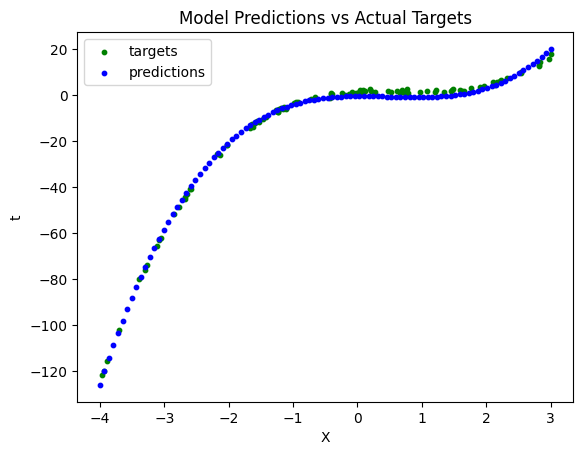

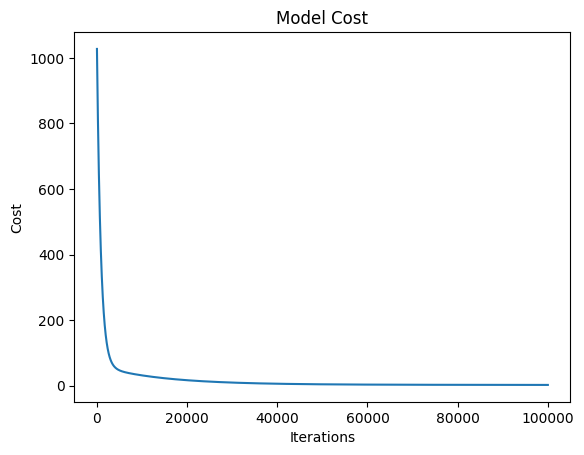

In [ ]:
# your plotting code here

# Choose the degree of the polynomial
degree = 3

# Generate features for polynomial regression
X_poly = np.array([compute_features(x, degree) for x in X.flatten()])

# Add bias term to X_poly
X_poly_b = np.append(X_poly, np.ones((len(X_poly), 1)), axis=1)

# Perform gradient descent
theta, cost_list = gradient_descent(X_poly_b, t)

# Plot the original data and the fitted curve
plt.scatter(X, t, color='green', s=10, label='targets')
x_values = np.linspace(x_min, x_max, 100).reshape(-1, 1)
X_values_poly = np.array([compute_features(x, degree) for x in x_values.flatten()])
X_values_poly_b = np.append(X_values_poly, np.ones((len(X_values_poly), 1)), axis=1)
y_values = X_values_poly_b.dot(theta)
plt.scatter(x_values, y_values, color='blue',s=10, label='predictions')
plt.legend()
plt.xlabel('X')
plt.ylabel('t')
plt.title('Model Predictions vs Actual Targets')
plt.show()

# Plot the cost function over iterations
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Model Cost')
plt.show()


### d) Regularization & SGD (for A+)

Here you need to do two things:
1. Add a regularization term  to the loss function, $\text{Loss_reg} = sum (w_i)^2$ the sum of the squares of the weights. That is, the model will be penalized for large weights.
2. Compute the derivative of the loss with respect to this term, and add it to the gradient computation. This should make the gradients cause the weights to gradually decrease, unless they are actively useful for the model.

Use stochastic gradient descent. This means that instead of computing the gradient on the entire dataset, you will now just work with a few examples at a time. Your gradient descent function can now also take a `batch_size`, so that it randomly selects that size of subset from the full example set.


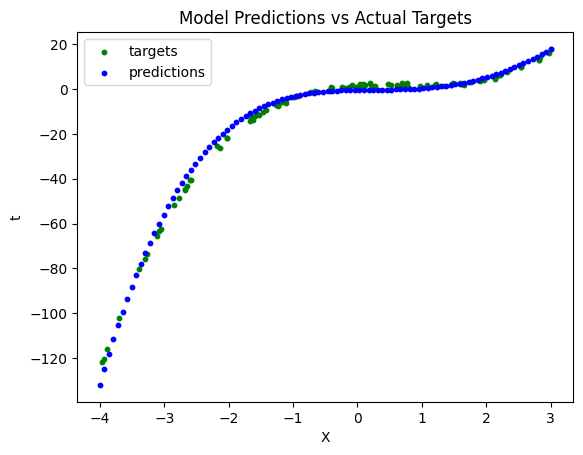

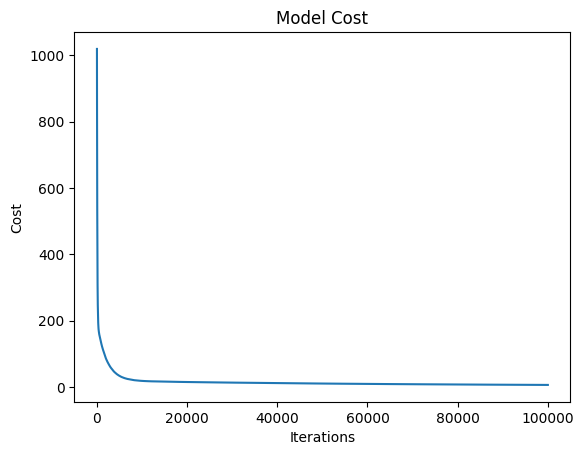

In [ ]:
# your code here

def compute_gradient_regularization(X_b, theta, t, lambda_reg):
    m = len(X_b)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - t) + 2 * lambda_reg * theta
    return gradients

def stochastic_gradient_descent(X_b, t, learning_rate=0.000001, n_iterations=100000, batch_size=32, lambda_reg=0.01):
    theta = np.zeros((X_b.shape[1], 1))
    m = len(X_b)
    cost_list = []

    for iteration in range(n_iterations):
        # Shuffle the data and select a random batch
        indices = np.random.choice(m, batch_size, replace=False)
        X_batch = X_b[indices]
        t_batch = t[indices]

        gradients = compute_gradient_regularization(X_batch, theta, t_batch, lambda_reg)

        # Update the parameters using the gradient and learning rate
        theta = theta - learning_rate * gradients

        # Compute cost on entire dataset for monitoring, lambda_reg * np.sum(theta**2) represents the L2 regularization term
        cost = np.linalg.norm(X_b.dot(theta) - t) ** 2 / m + lambda_reg * np.sum(theta**2)
        cost_list.append(cost)

    return theta, cost_list

# Choose the degree of the polynomial
degree = 4

# Generate features for polynomial regression
X_poly = np.array([compute_features(x, degree) for x in X.flatten()])

# Add bias term to X_poly
X_poly_b = np.append(X_poly, np.ones((len(X_poly), 1)), axis=1)

# Perform stochastic gradient descent
theta, cost_list = stochastic_gradient_descent(X_poly_b, t, batch_size=32, lambda_reg=0.01)

# Plot the original data and the fitted curve
plt.scatter(X, t, color='green', s=10, label='targets')
x_values = np.linspace(x_min, x_max, 100).reshape(-1, 1)
X_values_poly = np.array([compute_features(x, degree) for x in x_values.flatten()])
X_values_poly_b = np.append(X_values_poly, np.ones((len(X_values_poly), 1)), axis=1)
y_values = X_values_poly_b.dot(theta)
plt.scatter(x_values, y_values, color='blue',s=10, label='predictions')
plt.legend()
plt.xlabel('X')
plt.ylabel('t')
plt.title('Model Predictions vs Actual Targets')
plt.show()

# Plot the cost function over iterations
plt.plot(cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Model Cost')
plt.show()


## **Bonus: Validation and Testing** ( pts)

Revise your answers for Questions 2 and 3 and add code where needed so that your graphs also show results on a validation set.

In [ ]:
# your code here